In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
data = pd.read_csv("Crop_production.csv")

In [14]:
data.head()

,Unnamed: 0,State_Name,Crop_Type,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop
0,0,andhra pradesh,kharif,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,1
1,1,andhra pradesh,kharif,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,3
2,2,andhra pradesh,kharif,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,2
3,3,andhra pradesh,kharif,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,4
4,4,andhra pradesh,kharif,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,5


In [15]:
data.describe()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop
count,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,9.982700e+04,99827.000000,99827.000000
mean,49926.686067,69.816483,41.593907,42.036373,5.643616,701.110678,26.683940,16480.164759,3.776982e+04,3.931511,11.064642
std,28826.675865,39.571385,15.052453,28.426910,0.505298,604.762055,4.851727,43608.404049,1.222565e+05,33.875783,7.736309
min,0.000000,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00,0.000000,1.000000
25%,24956.500000,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.630000e+02,0.586601,5.000000
50%,49935.000000,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.507000e+03,1.329650,9.000000
75%,74891.500000,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8100.000000,1.440000e+04,2.997404,16.000000
max,99848.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06,9801.000000,54.000000


In [16]:
data['Area_in_hectares'] = pd.to_numeric(data['Area_in_hectares'], errors='coerce')

In [17]:
data.head()

,Unnamed: 0,State_Name,Crop_Type,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop
0,0,andhra pradesh,kharif,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671,1
1,1,andhra pradesh,kharif,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030,3
2,2,andhra pradesh,kharif,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901,2
3,3,andhra pradesh,kharif,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000,4
4,4,andhra pradesh,kharif,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615,5


In [18]:
data.describe()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec,Crop
count,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,99827.000000,9.982700e+04,99827.000000,99827.000000
mean,49926.686067,69.816483,41.593907,42.036373,5.643616,701.110678,26.683940,16480.164759,3.776982e+04,3.931511,11.064642
std,28826.675865,39.571385,15.052453,28.426910,0.505298,604.762055,4.851727,43608.404049,1.222565e+05,33.875783,7.736309
min,0.000000,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00,0.000000,1.000000
25%,24956.500000,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.630000e+02,0.586601,5.000000
50%,49935.000000,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.507000e+03,1.329650,9.000000
75%,74891.500000,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8100.000000,1.440000e+04,2.997404,16.000000
max,99848.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06,9801.000000,54.000000


REGRESSOR

In [21]:
X = data.drop(columns=['State_Name','Crop_Type','Area_in_hectares','Production_in_tons','Crop'], axis = 1)
y = data['Crop']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Accuracy: 0.9892002404795931
Mean Squared Error (MSE): 0.6427927476710408
Root Mean Squared Error (RMSE): 0.8017435672776182


In [23]:
X = data.drop(columns=['State_Name','Crop_Type','Crop'], axis = 1)
y = data['Crop']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate Accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Accuracy: 0.9918652582761591
Mean Squared Error (MSE): 0.4841730942602424
Root Mean Squared Error (RMSE): 0.6958254768691948


CLASSIFIER

[0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1]
107
103
Gini : -3.5016326530612245
Accuracy is:  1.0
Mean Squared Error (MSE): 0.011111111111111112
Root Mean Squared Error (RMSE): 0.10540925533894598


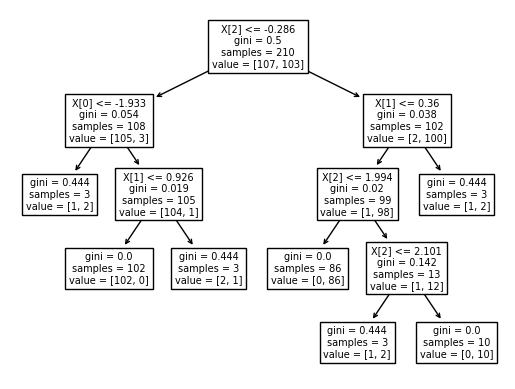

In [3]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X, t = make_classification(300, 5, n_classes=2, shuffle=True, random_state=44)
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=1)

# Initialize the decision tree classifier with tuned hyperparameters
model = DecisionTreeClassifier(max_depth=10, min_samples_split=6, min_samples_leaf=3)
model.fit(X_train, t_train)

# Predictions on the test set
predicted_value = model.predict(X_test)

print(predicted_value)

tree.plot_tree(model)

zeroes = 0
ones = 0
for i in range(0, len(t_train)):
	if t_train[i] == 0:
		zeroes += 1
	else:
		ones += 1

print(zeroes)
print(ones)

val = 1 - ((zeroes/70)*(zeroes/70) + (ones/70)*(ones/70))
print("Gini :", val)

match = 0
UnMatch = 0

for i in range(30):
	if predicted_value[i] == t_test[i]:
		match += 1
	else:
		UnMatch += 1

accuracy = match/30
print("Accuracy is: ", accuracy)

mse = mean_squared_error(t_test, predicted_value)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)